In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


Load the dataset

In [222]:
df=pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1. Make a list of categorical and numerical columns in the data.

In [10]:
 df.select_dtypes(include=['object'])
 df.select_dtypes(include=np.number)

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [ ]:
2. Compute the average bill amount for each day.

In [14]:
df.groupby('day')['total_bill'].mean()


day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

3.Which gender is more generous in giving tips?

In [20]:
avg_tip_by_gender=df.groupby('sex')['tip'].mean()
print(avg_tip_by_gender)


sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


4. According to the data, were there more customers for dinner or lunch?

In [25]:
total_customers_by_time = df.groupby('day')['time'].sum()
print(total_customers_by_time)

day
Fri     DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...
Sat     DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...
Sun     DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...
Thur    LunchLunchLunchLunchLunchLunchLunchLunchLunchL...
Name: time, dtype: object


5. Based on the statistical summary, comment on the variable 'tip'

In [26]:
tip_comment = df['tip'].describe()
print(tip_comment)

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


 6. Find the busiest day in terms of the orders?

In [30]:
total_orders_by_day = df.groupby('day')['time'].sum()
busiest_day = total_orders_by_day.idxmax()
print("The busiest day in terms of orders is:", busiest_day)

The busiest day in terms of orders is: Thur


7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

1.1332130376158205


<Axes: xlabel='total_bill', ylabel='Count'>

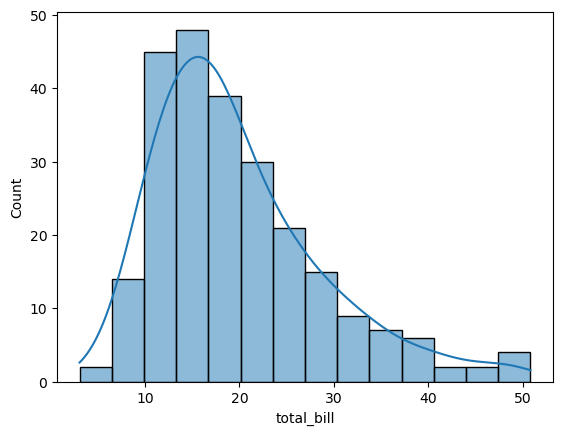

In [38]:
skewness=df['total_bill'].skew()
print(skewness)
sns.histplot(df['total_bill'], kde=True)


the total_bill variable is sligthly right skewed that we can analysis from above plot and the skewness value

 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate 
plot and metric and write your findings.

Correlation coefficient: 0.6757341092113646


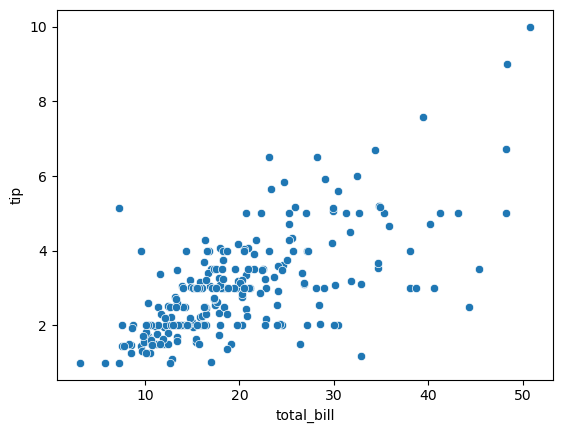

In [43]:
# Create a scatter plot to visualize the relationship between "total_bill" and "tip"
sns.scatterplot(data=df, x='total_bill', y='tip')
correlation = df['total_bill'].corr(df['tip'])
print("Correlation coefficient:", correlation)

yes the tip amount is dependent upon total bill as we can see from the scatter plot as total bill increases tip also increases
tip has a moderate positive correlation with the total bill

9. What is the percentage of males and females in the dataset? and display it in the plot

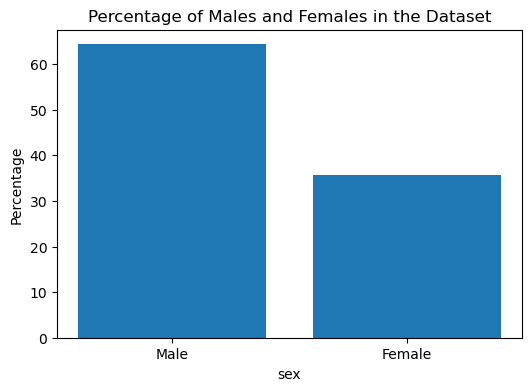

In [46]:
gender_counts = df['sex'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100
plt.figure(figsize=(6, 4))
plt.bar(gender_percentages.index, gender_percentages.values)
plt.xlabel('sex')
plt.ylabel('Percentage')
plt.title('Percentage of Males and Females in the Dataset')
plt.show()

10. Compute the gender-wise count based on smoking habits and display it in the plot

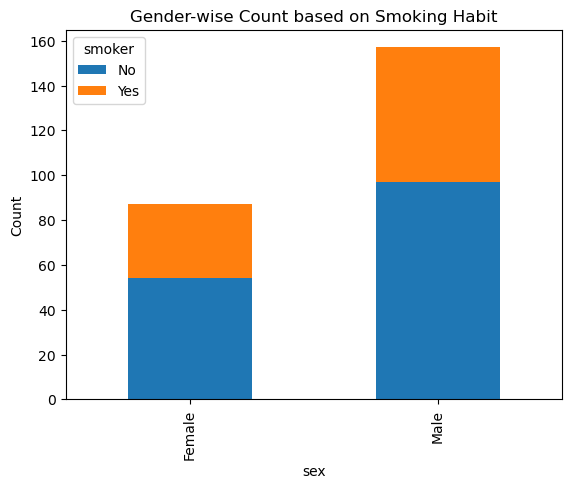

In [50]:
gender_smoking_counts = df.groupby(['sex', 'smoker']).size().unstack()
gender_smoking_counts.plot(kind='bar', stacked=True)
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Gender-wise Count based on Smoking Habit')

# Display the plot
plt.show()

11.compute the average tip amount given for different days and display it in the plot

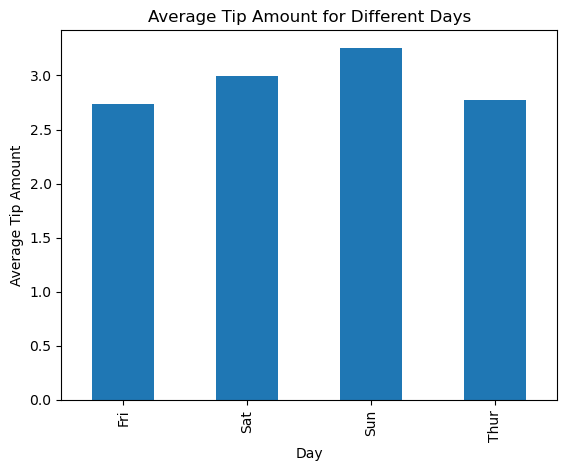

In [52]:
# Group the data by day and calculate the average tip amount
average_tip_by_day = df.groupby('day')['tip'].mean()

# Plot the average tip amount for different days
average_tip_by_day.plot(kind='bar')

# Set the labels and title for the plot
plt.xlabel('Day')
plt.ylabel('Average Tip Amount')
plt.title('Average Tip Amount for Different Days')

# Display the plot
plt.show()

12.is the average bill amount dependent on the size of the group? visualize the relationship
using appropriate plot and your finding


Correlation coefficient: 0.9729199590970035


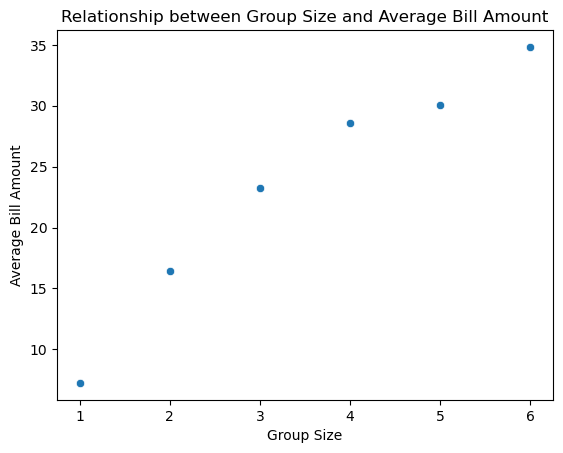

In [53]:
# Calculate the average bill amount for each group size
average_bill_by_size = df.groupby('size')['total_bill'].mean().reset_index()

# Create a scatter plot to visualize the relationship between group size and average bill amount
sns.scatterplot(data=average_bill_by_size, x='size', y='total_bill')

# Calculate the correlation coefficient between group size and average bill amount
correlation = average_bill_by_size['size'].corr(average_bill_by_size['total_bill'])

# Print the correlation coefficient
print("Correlation coefficient:", correlation)

# Set the labels and title for the plot
plt.xlabel('Group Size')
plt.ylabel('Average Bill Amount')
plt.title('Relationship between Group Size and Average Bill Amount')

# Display the plot
plt.show()

yes the average bill amount dependent on the size of the group as we analyse from the above graph
with increase in the size of the group there is increase in the average bill paid


13.plot the horizontal boxplot to compare the bill amount based on the gender

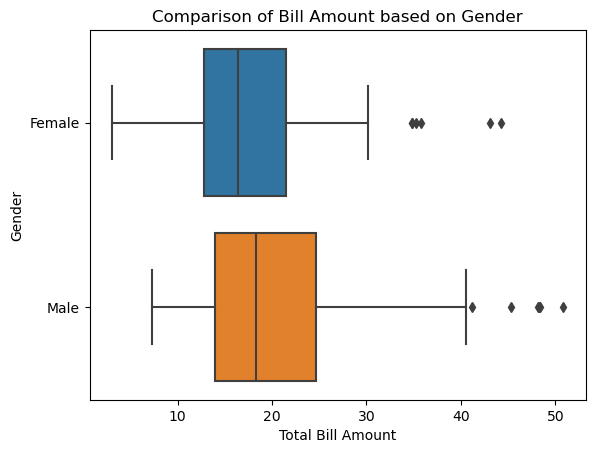

In [54]:
# Create a horizontal boxplot to compare the bill amount based on gender
sns.boxplot(data=df, x='total_bill', y='sex', orient='h')

# Set the labels and title for the plot
plt.xlabel('Total Bill Amount')
plt.ylabel('Gender')
plt.title('Comparison of Bill Amount based on Gender')

# Display the plot
plt.show()

14.find the maximum bill amount for lunch and dinner on saturday and sunday

In [80]:

df.groupby(['time','day'])['total_bill'].max()


time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64

15.compute the percent of dataset of missing values

In [82]:
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

16.is there are any duplicate records in the dataset? if yes compute the count of duplicate records 
and drop them

In [219]:
len(df[df.duplicated()])

1


yes ,there is a duplicate records

In [224]:
df.drop_duplicates(inplace=True)

In [225]:
#recheck
len(df[df.duplicated()])

0

17.is there any outlier present in the column total bill? if yes treat them with transformation approach
and plot a boxplot before and after the treatment

<Axes: xlabel='total_bill'>

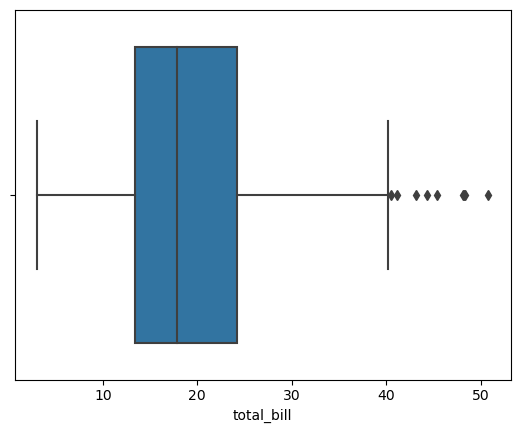

In [101]:

# Plotting the boxplot before treatment
sns.boxplot(data=df, x='total_bill')

<Axes: xlabel='total_bill'>

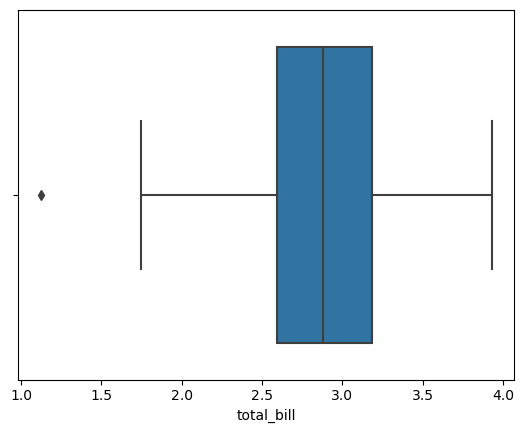

In [104]:
# Applying log transformation to the 'total bill' column
df['total_bill'] = np.log(df['total_bill'])
# Plotting the boxplot after treatment
sns.boxplot(data=df, x='total_bill')


18.is there any outlier present in column 'tip' if yes remove them using iqr technique

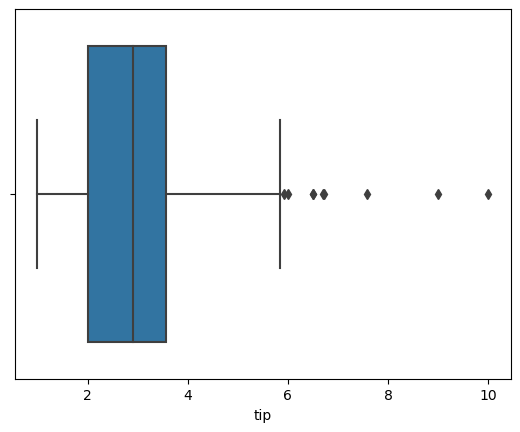

In [148]:
sns.boxplot(x=df['tip'])
plt.show()

In [164]:
# Calculate the IQR and define the upper and lower bounds:
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [165]:
#Identify the outliers:
outliers = df[(df['tip'] < lower_bound) | (df['tip'] > upper_bound)]

In [166]:
df = df[(df['tip'] >= lower_bound) & (df['tip'] <= upper_bound)]


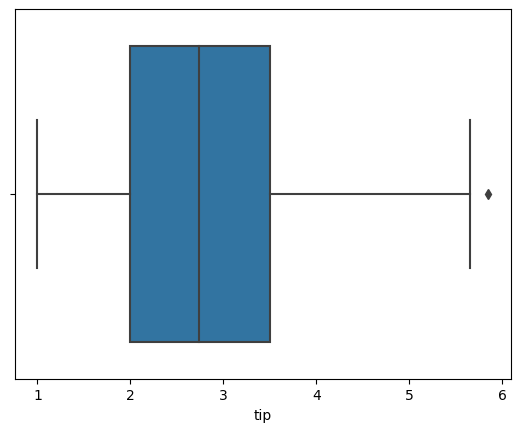

In [167]:
sns.boxplot(x=df['tip'])
plt.show()

19.Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [141]:
df=pd.get_dummies(df,drop_first=True)
df.sample(5)

,total_bill,tip,size,total_bill_transformed,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
205,16.47,3.23,3,0.280687,False,True,False,False,True,True
93,16.32,4.30,2,0.277545,False,True,False,False,False,False
80,19.44,3.00,2,0.342899,True,True,False,False,True,True
111,7.25,1.00,1,0.087558,False,False,True,False,False,False
231,15.69,3.00,3,0.264349,True,True,True,False,False,False


In [ ]:
20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [137]:
range_total_bill = df['total_bill'].max() - df['total_bill'].min()
print("Range of total_bill column:", range_total_bill)

Range of total_bill column: 47.74


In [138]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['total_bill_transformed'] = scaler.fit_transform(df[['total_bill']])

In [140]:
range_total_bill_transformed = df['total_bill_transformed'].max() - df['total_bill_transformed'].min()
print("Range of total_bill_transformed column:", range_total_bill_transformed)

Range of total_bill_transformed column: 0.9999999999999999


 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [192]:
tips_df = pd.read_csv('tips.csv')
tips_df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [193]:
tips_df=pd.get_dummies(tips_df,drop_first=True)
tips_df.head(2)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False


In [194]:
#storing the target variable in y column and rest of variable in x column
x=tips_df.drop('tip',axis=1)
y=tips_df['tip']

22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [212]:
X = tips_df.drop('tip', axis=1)
y = tips_df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
scaler = MinMaxScaler()
X_train[['total_bill', 'size']] = scaler.fit_transform(X_train[['total_bill', 'size']])
X_test[['total_bill', 'size']] = scaler.transform(X_test[['total_bill', 'size']])


(170, 8) (74, 8)
(170,) (74,)


23Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [214]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [215]:
#Make predictions on the test data:
y_pred = model.predict(X_test)

In [217]:
r_squared = r2_score(y_test, y_pred)
print("R-squared value:", r_squared)

R-squared value: 0.29309667441267384
